In [0]:
Path = '/content/drive/My Drive/DataSet'

In [97]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
cd /content/drive/My Drive/DataSet

/content/drive/My Drive/DataSet


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


In [0]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [0]:
df= pd.read_csv('event.txt')

In [0]:
#df.head() #to get insight of data

In [0]:
#df.shape #axis 1 , axis  =0

In [0]:
#print(df.dtypes)


In [0]:
df['Date'] = pd.to_datetime(df['Date']) #to convert object data type to date-time object
#df.index = df['Date'] #setting Date as index

In [0]:
#print(df.dtypes)

In [0]:
#df.head()

In [0]:
#df.shape[1] repsents y axis

In [0]:
#df.shape[0] # represents x axis

In [0]:
OH = df['Open']-df['High']
OH = OH.abs()

In [0]:
OL = df['Open'] - df['Low']
OL = OL.abs()

In [0]:
HL = df['High'] - df['Low']
HL = HL.abs()

In [0]:
CH = df['Close'] - df['High']
CH = CH.abs()

In [0]:
CL = df['Close'] - df['Low']
CL = CL.abs()

In [0]:
change = OH + OL + HL + CH + CL 


In [0]:
df['Change'] = change

In [0]:
#df.head()

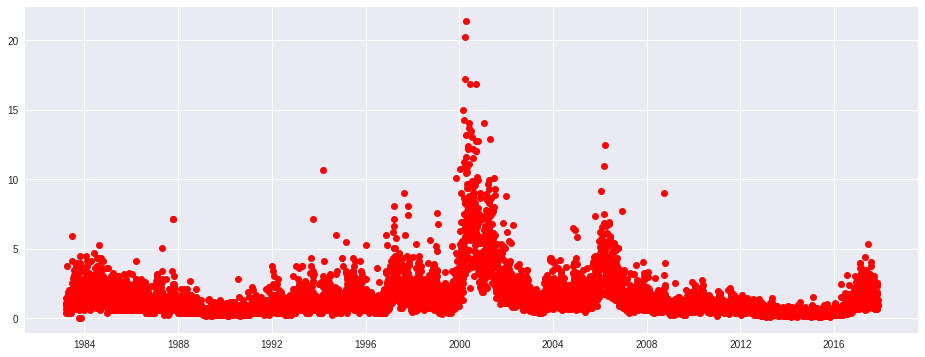

In [117]:
#visualising change distribution
rcParams['figure.figsize'] = 16 , 6
plt.plot(df['Date'],df['Change'] , 'ro')

In [0]:
df['y1'] = df['Change'].loc[df['Date'] <= '1996']

In [0]:
df['y2'] = df['Change'].loc [ (df['Date'] <= '1998') & (df['Date'] > '1996') ]

In [0]:
df['y3'] = df['Change'].loc[(df['Date'] <= '2002') & (df['Date'] > '1998') ]

In [0]:
df['y4'] = df['Change'].loc[(df['Date'] <= '2008') & (df['Date'] > '2002') ]

In [0]:
df['y5'] = df['Change'].loc[(df['Date'] > '2008') ]

In [0]:
#making boundary line parameter by intuition omly
stdy1 = (df['y1'].std() + df['y1'].mean())*3
stdy2 = (df['y2'].std() + df['y2'].mean())*2.8
stdy3 = (df['y3'].std() + df['y3'].mean())*2.5
stdy4 = (df['y4'].std() + df['y4'].mean())*3
stdy5 = (df['y5'].std() + df['y5'].mean())*3

In [0]:
df['Date'] = pd.to_datetime(df['Date']).dt.date  #to take only dates

In [0]:
datelist = []  #list to store events


In [0]:
# adding events to datelist LIST
i = 0
cnt = 0

for i in range (df['y1'].size):
  if df['y1'].iloc[i] > stdy1:
    #print (df['Date'].iloc[i])
    cnt= cnt+1
    datelist.append(df['Date'].iloc[i])

i = 0
for i in range (df['y2'].size):
  if df['y2'].iloc[i] > stdy1:
    #print (df['Date'].iloc[i])
    cnt= cnt+1
    datelist.append(df['Date'].iloc[i])


i = 0
for i in range (df['y3'].size):
  if df['y3'].iloc[i] > stdy1:
    #print (df['Date'].iloc[i])
    cnt= cnt+1
    datelist.append(df['Date'].iloc[i])
i = 0
for i in range (df['y4'].size):
  if df['y4'].iloc[i] > stdy1:
    #print (df['Date'].iloc[i])
    cnt= cnt+1
    datelist.append(df['Date'].iloc[i])
i = 0
for i in range (df['y5'].size):
  if df['y5'].iloc[i] > stdy1:
    #print (df['Date'].iloc[i])
    cnt= cnt+1
    datelist.append(df['Date'].iloc[i])

In [0]:
#converting datlist LIST to dateframe DATAFRAME
dateframe = pd.DataFrame(datelist,columns = ['Date'])
dateframe['Date'] = pd.to_datetime(dateframe['Date'])


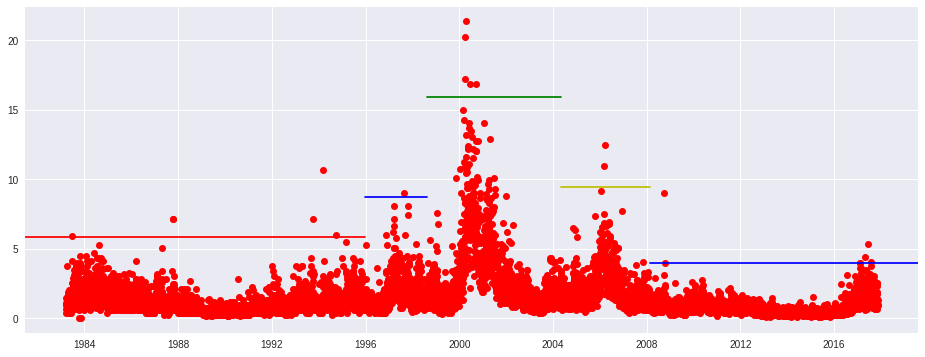

In [128]:
#plotting the final graph with lines
rcParams['figure.figsize'] = 16 , 6
plt.plot(df['Date'],df['Change'] , 'ro')
plt.axhline(y=stdy1, xmin=0, xmax=.38,color='r',linestyle= '-')
plt.axhline(y=stdy2, xmin=0.38, xmax=.45,color='b',linestyle= '-')
plt.axhline(y=stdy3, xmin=0.45, xmax=.6,color='g',linestyle= '-')
plt.axhline(y=stdy4,xmin=0.6, xmax=.7,color='y',linestyle= '-')
plt.axhline(y=stdy5,xmin=0.7, xmax=1,color='b',linestyle= '-')

In [132]:
print ("Total no. of prdicted events  = %d" % (cnt))
print(dateframe)

Total no. of prdicted events  = 209
          Date
0   1983-06-23
1   1987-10-19
2   1987-10-20
3   1993-10-05
4   1994-03-10
5   1994-10-03
6   1996-11-14
7   1997-03-12
8   1997-03-14
9   1997-03-18
10  1997-03-19
11  1997-08-18
12  1997-09-03
13  1997-10-27
14  1997-10-28
15  1999-01-13
16  1999-02-03
17  1999-11-11
18  2000-01-19
19  2000-01-20
20  2000-01-24
21  2000-01-25
22  2000-03-07
23  2000-03-08
24  2000-03-09
25  2000-03-10
26  2000-03-13
27  2000-03-14
28  2000-03-23
29  2000-03-29
..         ...
179 2001-07-06
180 2001-07-13
181 2001-07-18
182 2001-11-08
183 2002-01-03
184 2002-01-17
185 2002-04-18
186 2004-11-12
187 2004-12-06
188 2005-01-11
189 2005-10-12
190 2006-01-10
191 2006-01-12
192 2006-01-18
193 2006-01-30
194 2006-02-09
195 2006-02-14
196 2006-02-28
197 2006-03-03
198 2006-03-13
199 2006-03-14
200 2006-03-21
201 2006-04-13
202 2006-04-17
203 2006-05-22
204 2006-05-23
205 2006-05-24
206 2006-06-02
207 2006-12-14
208 2008-09-29

[209 rows x 1 columns]
